In [156]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

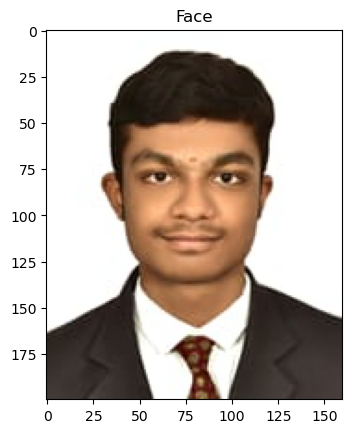

In [157]:

faceImage = cv2.imread('vishnupass.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [158]:

faceImage.shape

(200, 160, 3)

In [159]:

#resized_faceImage.shape
faceImage.shape

(200, 160, 3)

Text(0.5, 1.0, 'glassPNG')

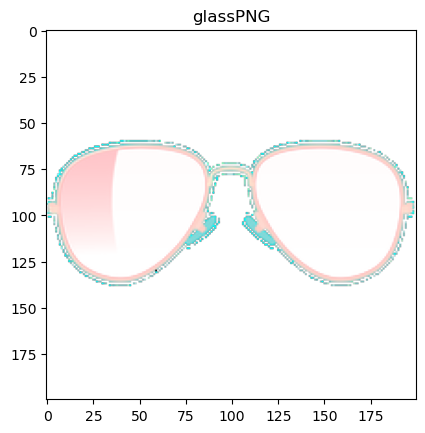

In [160]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('sunglass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")


In [161]:
h, w = faceImage.shape[:2]
glassW = w // 2
aspect = glassPNG.shape[0] / glassPNG.shape[1]
glassH = int(glassW * aspect)
glassPNG = cv2.resize(glassPNG,(glassW,glassH))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(80, 80, 4)


In [162]:

glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

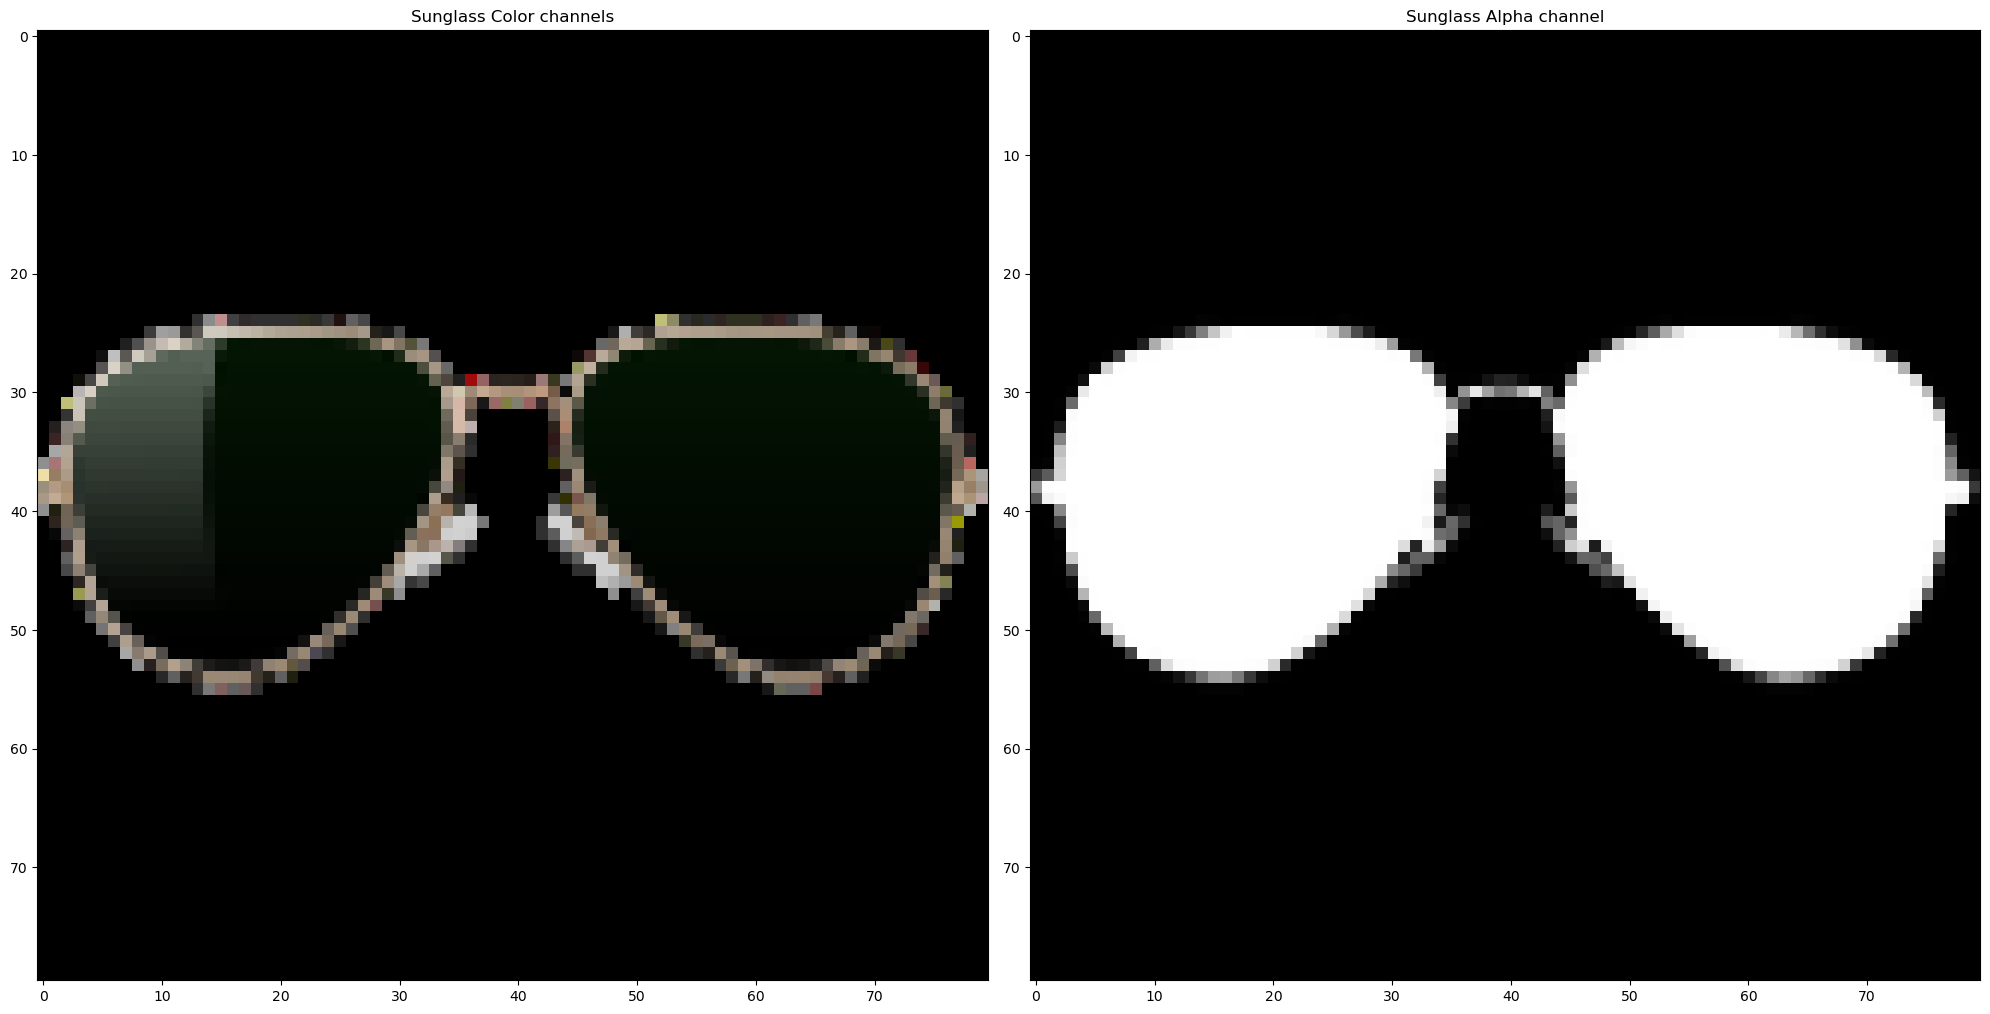

In [163]:

plt.figure(figsize=[20,10])
plt.subplot(121); plt.imshow(glassBGR[:,:,::-1], interpolation='nearest'); plt.title('Sunglass Color channels')
plt.subplot(122); plt.imshow(glassMask1, cmap='gray', interpolation='none', vmin=0, vmax=255); plt.title('Sunglass Alpha channel')
plt.tight_layout()
plt.show()

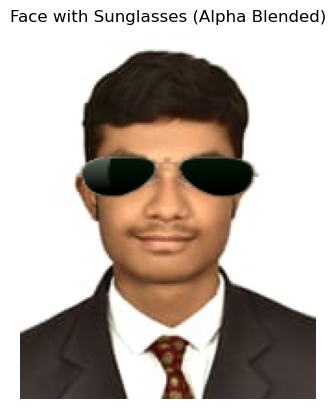

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Copy face image
faceWithGlassesNaive = faceImage.copy()

# Eye region where glasses will be placed
start_row, end_row = 50, 110   # Adjusted to match your 200x160 image
start_col, end_col = 30, 130

# Resize glassBGR and glassMask to fit region
glassBGR_resized = cv2.resize(glassBGR, (end_col - start_col, end_row - start_row))
glassMask_resized = cv2.resize(glassMask1, (end_col - start_col, end_row - start_row))

# Normalize alpha mask
alpha = glassMask_resized / 255.0
alpha = alpha[..., None]  # Make it (H,W,1) so it can broadcast

# Blend sunglass with face region
roi = faceWithGlassesNaive[start_row:end_row, start_col:end_col]
blended = (alpha * glassBGR_resized + (1 - alpha) * roi).astype(np.uint8)

# Place blended region back on face
faceWithGlassesNaive[start_row:end_row, start_col:end_col] = blended

# Show result
plt.imshow(faceWithGlassesNaive[..., ::-1])
plt.title("Face with Sunglasses (Alpha Blended)")
plt.axis("off")
plt.show()
